## Task 1: Import packages and Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#path  = "/Users/MANH HUNG CN/OneDrive - VNU-HCMUS/AI/Python/Pandas, Matplotlib/Sales Reporting/Data"
path = input("Input path folder: ")

## Task 2: Clean and Prepocess data

### Task 2.1: Merge 12-month data

In [2]:
# Use for data in folder
files = os.listdir(path)
df = []
for file in files:
    filename = path + "/" + file
    df.append(pd.read_csv(filename))
df = pd.concat(df)
df.to_csv('sale2019.csv',index = False)

FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

In [ ]:
# Just use for data same format
df = pd.read_csv('Data/sales2019_1.csv')
print(df.shape)
for i in range(11):
    path = 'Data/sales2019_' + str(i+2) + '.csv'
    df1 = pd.read_csv(path)
    df = pd.concat([df,df1])
print(df.shape)
df.to_csv('sale2019.csv',index = False)

(9723, 6)
(186850, 6)


In [ ]:
print(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Task 2.2: Add Month column

In [ ]:
# Get month to create column
df['Month'] = df['Order Date'].str[0:2]
df = df.dropna(how='all') # Drop column where all elements are missing
df = df[df['Month'] != 'Or'] # Select all columns have values different 'Or'
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Sale'] = df['Quantity Ordered']* df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [ ]:
sales = df.groupby(['Month'])['Sale'].sum()
print(sales)
print("The best month for sales is: " + str(sales.idxmax()) + ", that month earned: " + str(sales.max()))


Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sale, dtype: float64
The best month for sales is: 12, that month earned: 4613443.34


([<matplotlib.axis.XTick object at 0x000002504B8EE710>, <matplotlib.axis.XTick object at 0x0000025047139C50>, <matplotlib.axis.XTick object at 0x000002504B9D61D0>, <matplotlib.axis.XTick object at 0x0000025047193690>, <matplotlib.axis.XTick object at 0x000002504719D850>, <matplotlib.axis.XTick object at 0x00000250471A4A10>, <matplotlib.axis.XTick object at 0x000002504719C2D0>, <matplotlib.axis.XTick object at 0x00000250471B57D0>, <matplotlib.axis.XTick object at 0x00000250471BAF90>, <matplotlib.axis.XTick object at 0x00000250471C33D0>, <matplotlib.axis.XTick object at 0x00000250471CC690>, <matplotlib.axis.XTick object at 0x000002504B85A610>], [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6'), Text(7, 0, '7'), Text(8, 0, '8'), Text(9, 0, '9'), Text(10, 0, '10'), Text(11, 0, '11'), Text(12, 0, '12')])


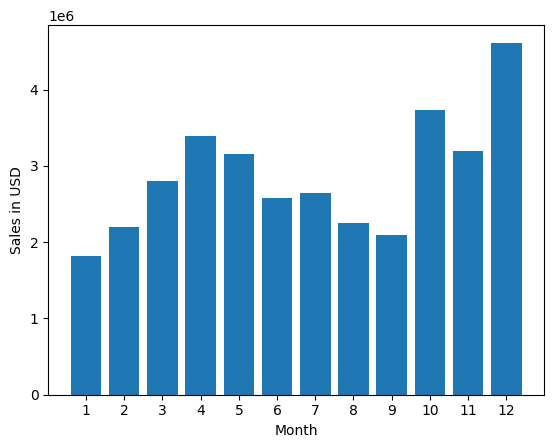

In [ ]:
months = range(1,13)
plt.bar(x = months, height = sales)
print(plt.xticks(ticks = months))
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: What city has the best sales?

In [ ]:
address = df['Purchase Address'].str.split(",",expand = True)
df['City'] = address[1]
df

C:\Users\MANH HUNG CN\AppData\Local\Temp\ipykernel_19292\1810015049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = address[1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [ ]:
sales_city = df.groupby(['City'])['Sale'].sum()
print(sales_city)
print("The best month for sales is: " + str(sales_city.idxmax()) + ", that month earned: " + str(sales_city.max()))


City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sale, dtype: float64
The best month for sales is:  San Francisco, that month earned: 8262203.91


([<matplotlib.axis.XTick object at 0x0000025049F2CA10>, <matplotlib.axis.XTick object at 0x0000025049F5DE10>, <matplotlib.axis.XTick object at 0x0000025049E72B50>, <matplotlib.axis.XTick object at 0x0000025049E608D0>, <matplotlib.axis.XTick object at 0x0000025049E5F650>, <matplotlib.axis.XTick object at 0x000002504A006650>, <matplotlib.axis.XTick object at 0x0000025049E51FD0>, <matplotlib.axis.XTick object at 0x0000025049E4D350>, <matplotlib.axis.XTick object at 0x0000025049E44510>], [Text(0.0, 0, ' Atlanta'), Text(1.0, 0, ' Austin'), Text(2.0, 0, ' Boston'), Text(3.0, 0, ' Dallas'), Text(4.0, 0, ' Los Angeles'), Text(5.0, 0, ' New York City'), Text(6.0, 0, ' Portland'), Text(7.0, 0, ' San Francisco'), Text(8.0, 0, ' Seattle')])


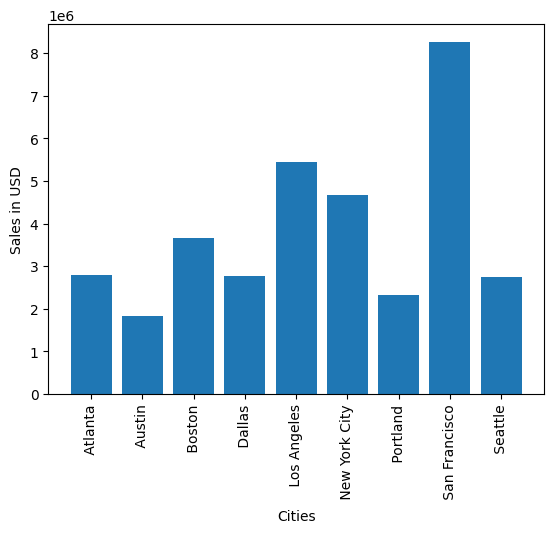

In [ ]:
city = sales_city.index
plt.bar(x = city, height = sales_city)
print(plt.xticks(city))
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.xticks(rotation=90)
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [ ]:
df['Time'] = df['Order Date'].str[-5:-3]
df

C:\Users\MANH HUNG CN\AppData\Local\Temp\ipykernel_19292\3296539411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['Order Date'].str[-5:-3]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,06
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [ ]:
times = df.groupby(['Time'])['Quantity Ordered'].count()
print(times)
print("The time we display ads: " + str(times.idxmax()) + ", that time has the number of purchases is: " + str(times.max()))

Time
00     3910
01     2350
02     1243
03      831
04      854
05     1321
06     2482
07     4011
08     6256
09     8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64
The time we display ads: 19, that time has the number of purchases is: 12905


([<matplotlib.axis.XTick object at 0x00000250447D55D0>, <matplotlib.axis.XTick object at 0x0000025042C64750>, <matplotlib.axis.XTick object at 0x0000025042C7D910>, <matplotlib.axis.XTick object at 0x0000025042C2A810>, <matplotlib.axis.XTick object at 0x0000025042C22410>, <matplotlib.axis.XTick object at 0x0000025042C16350>, <matplotlib.axis.XTick object at 0x0000025042C10990>, <matplotlib.axis.XTick object at 0x0000025042C09E50>, <matplotlib.axis.XTick object at 0x0000025042C24250>, <matplotlib.axis.XTick object at 0x0000025042C03B10>, <matplotlib.axis.XTick object at 0x0000025042BF7C90>, <matplotlib.axis.XTick object at 0x0000025042BF18D0>, <matplotlib.axis.XTick object at 0x0000025042BE87D0>, <matplotlib.axis.XTick object at 0x0000025042BFB450>, <matplotlib.axis.XTick object at 0x0000025042BDC5D0>, <matplotlib.axis.XTick object at 0x0000025042BD58D0>, <matplotlib.axis.XTick object at 0x0000025042BCBC90>, <matplotlib.axis.XTick object at 0x0000025042BC4F50>, <matplotlib.axis.XTick obj

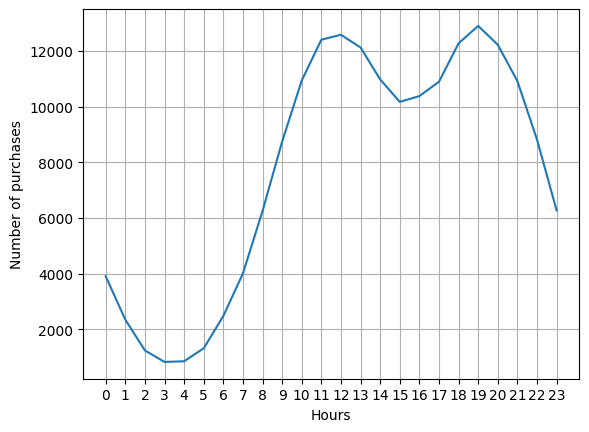

In [ ]:
hours = range(24)
plt.plot(hours, times)
print(plt.xticks(ticks = hours))
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of purchases')
plt.show()

### Task 3.4. What products are most often sold together?

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin,11
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,06
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [ ]:
df_dup = df[df.duplicated(subset = ['Order ID'],keep = False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,08
58,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,08
133,141365,Vareebadd Phone,1,400,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [ ]:
# Because parameter of apply/transform is function
#def joinProduct(product):
#   return ','.join(product)
# you can write short function
groupProduct = lambda product: ','.join(product)

In [ ]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct) #because apply return dataframe but we need series-> use transform


C:\Users\MANH HUNG CN\AppData\Local\Temp\ipykernel_19292\2953929842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct) #because apply return dataframe -> use transform


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Time,All Product
41,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,08,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",01,600.00,Boston,00,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",01,600.00,San Francisco,11,"Google Phone,Bose SoundSport Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
5314,300719,ThinkPad Laptop,1,999.99,12/14/19 17:32,"486 Chestnut St, Dallas, TX 75001",12,999.99,Dallas,17,"ThinkPad Laptop,Vareebadd Phone"
9585,304802,Google Phone,1,600,12/27/19 13:14,"569 Lake St, Los Angeles, CA 90001",12,600.00,Los Angeles,13,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
10759,305928,ThinkPad Laptop,1,999.99,12/08/19 16:33,"637 North St, Los Angeles, CA 90001",12,999.99,Los Angeles,16,"ThinkPad Laptop,ThinkPad Laptop"
10785,305952,Google Phone,1,600,12/21/19 10:35,"481 Hill St, San Francisco, CA 94016",12,600.00,San Francisco,10,"Google Phone,Flatscreen TV"


In [ ]:
df_dup = df_dup[['Order ID','All Product']].drop_duplicates()
df_dup

,Order ID,All Product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [ ]:
df_dup['All Product'].value_counts().head(10)

All Product
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

### Task 3.5: What product sold the most?

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [ ]:
number_product = df.groupby('Product').sum()['Quantity Ordered']
number_product
product = number_product.index
sum_price = df.groupby('Product').sum()['Sale']
each_price = sum_price / number_product
each_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
dtype: float64

C:\Users\MANH HUNG CN\AppData\Local\Temp\ipykernel_19292\1444223616.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, rotation=90)


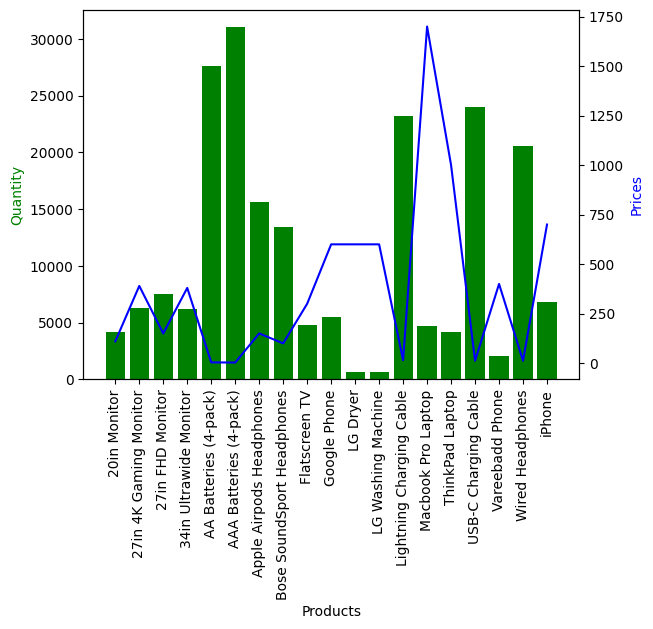

In [ ]:
x = product
y1 = number_product
y2 = each_price

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g')
ax2.plot(x, y2, 'b-')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(x, rotation=90)
plt.show()